# <center><font color='DarkSalmon'>Assignment Five</font></center>
### <center><font color='Salmon'>Computer Science 4304</font></center>
<center><font color ='LightSalmon'>Courtney St. George <br> 200917250 <br> Due: November 2, 2021</font></center>

This notebook uses two datasets
- The first contains this iris.csv dataset which contains information about measurements of the petals and sepals of flowers in the iris family
- The second contains information related to used car sales. The data consists of information related to used cars such as make, model, year, transmission, fuel, miles per gallon, engine size, milage, price, and tax.

Computations are completed using the datasets provided and the seaborn visualization library to create the following visualizations:
- The comparison of petal length compared to petal width for each species.
- The average petal area for each species with 95% confidence interval of average.
- The distribution of used car prices from 2005-2019 with median and interquartile range
- The average price of used cars based on transmission type from 2000-2019 with 95% confience interval of average and the number of cars that were sold during that period based on transmission type.

import relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read datasets containing information related to iris flowers and used cars

In [3]:
irisdf = pd.read_csv('iris.csv')
carsdf = pd.read_csv('used_cars.csv')
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Question 1: Using the iris.csv dataset, recreate the following plot using seaborn and matplotlib. This dataset contains measurements of the petals and sepals of flowers in the Iris family. The plot shows the petal length (x-axis) compared to the petal width (y-axis) for all the flowers in the dataset. Each point in the scatterplot is colour coded to the species, as given in the legend. 

- Created subplot and set figure size
- Petal_length on x axis, petal_width on y axis, hue set as species column from iris.csv
- Set title, and show plot

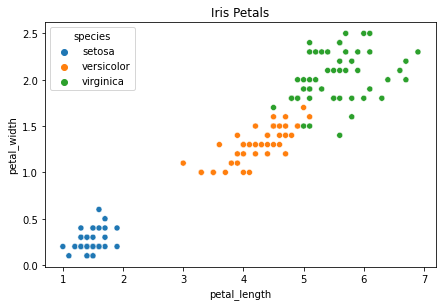

In [3]:
fig, ax = plt.subplots(figsize=(7, 4.5))
sns.scatterplot(x = 'petal_length', y= 'petal_width', data = irisdf, hue='species')
ax.set_title('Iris Petals')
plt.show()

#### Question 2: The following bar plot shows the average petal area for the three iris species in the iris.csv data set. The black lines on each bar represent the 95% confidence interval of the average. Re-create the plot using Seaborn's barplot() function, making sure to include the uncertainty, bar colours, and plot labels.

- Found petal area by multiplying width by length
- Created subplot and barplot using seaborn
- Set petal area on x axis, species on y, set confidence interval of average to 95% and linewidth and color.
- Set title and show plot

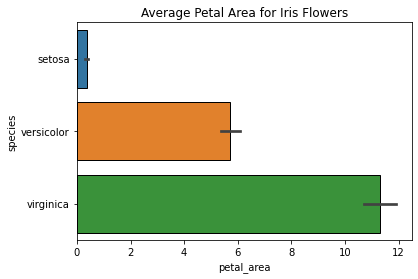

In [4]:
irisdf['petal_area'] = irisdf.petal_width * irisdf.petal_length

fig, ax = plt.subplots()

kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(x='petal_area', y='species', data= irisdf, ci=95, **kwargs)

ax.set_title('Average Petal Area for Iris Flowers')
plt.show()

#### Question 3: The following violin plot shows the distribution of used car prices from the used_cars.csv data set for the 15-year period from 2005 to 2019. Each violin has vertical lines showing the median and inter-quartile range. Re-create the above violin plot using Seaborn's violinplot() function. Each violin should indicate the position of the quartiles. The violins should be positioned with the year along the y-axis and price along the x-axis. (Hint: violinplot will do its best to determine which variable is categorical, but using orient= can give it a helping hand.)

- Filtered used_cars.csv to years between 2005 and 2019 and sorted values by year
- Created subplot and set figure size
- Created violinplot using seaborn with price on x axis, year on y axis, scale is set to width, orientated horizontally, palette set to gradient color, inner-quartile and median value is shown, outline width is set, bw parameter set to reduce smoothing. 
- Xticks are set at intervals of 10000, and labels are set to show 'K' in place of 1000
- Xlimit is set to position axis properly
- Xlabel is set, title is set, and plot is shown

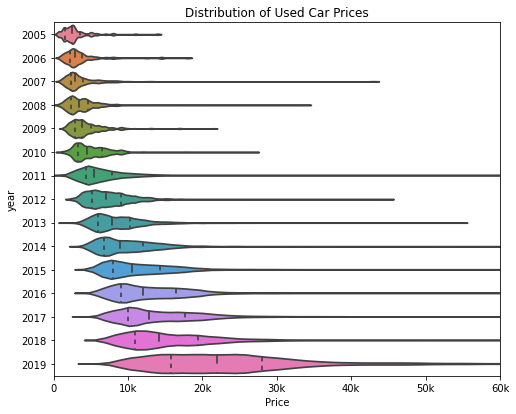

In [5]:
df = carsdf.sort_values(by='year', ascending=False)
df = df[(df.year >= 2005) & (df.year <= 2019)]

fig, ax = plt.subplots(figsize=(8, 6.5))

sns.violinplot(x= 'price', y= 'year', data = df, scale='width', orient='h', palette='husl', inner="quartile", linewidth=1.7, bw=0.1, ax=ax)
ax.set_xticks([0, 10000, 20000, 30000, 40000, 50000, 60000])
ax.set_xticklabels(['0', '10k', '20k', '30k', '40k', '50k', '60k'])
ax.set_xlim([0, 60000])
ax.set_xlabel('Price')
ax.set_title('Distribution of Used Car Prices')
plt.show()

#### Question 4: The following plot shows the average price of used cars from the used_cars.csv data set for the 20-year period from 2000-2019. The average prices are calculated separately for manual (orange) and automatic(blue) transmission. The legend is a bar plot that shows the number of cars that were sold during this period. Re-create the above plot. Your final plot should contain an orange line for the average price of manual transmission cars and a blue line for the average price of automatic transmission cars. There should be a legend in the upper left that is a bar plot displaying number of cars per transmission category, with the colours matching the line plot.

- Created two subplots
- Sort values by transmission, and filter transmission to just show automatic and manual
- Filtered years to only include years between 2000 and 2019 inclusively for line plot
- New dataframe df3 created to filter data for barplot, and group by transmission type and use aggregation function to count number of each.
- Renamed columns to make it more clear
- Lineplot created with year and x axis, price on y axis, hue is set to transmission, legend is turned off to replace it with the bar plot, axis is set to associate it with appropriate subplot, and confidence interval for average is set to 95%
- Barplot created with count on x axis and transmission on y, axis is set to assocaite it with appropriate subplot
- Used despine to remove axis borders 
- Set the positions of subplots
- Set barplot labels and xticks to be empty
- Set x and y limit for lineplot, along with xticks at 3 year intervals
- Set title, y label, and show plot

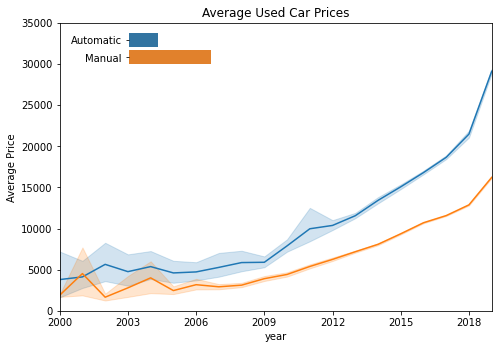

In [6]:
fig, ax = plt.subplots(1, 2)
#left bottom width height

df2 = carsdf.sort_values(by='transmission', ascending=True)
df2 = df2[(df2.transmission =="Automatic") | (df2.transmission == "Manual")]
df2 = df2[(df2.year >= 2000) & (df2.year <= 2019)].reset_index(drop=True)

df3 = df2.groupby('transmission')['price'].count().reset_index()
df3.columns = ['transmission', 'count']

sns.lineplot(x = 'year', y= 'price', data = df2, hue='transmission', legend=False, ax = ax[0], ci=95)
sns.barplot(x='count', y='transmission', data =df3, ax= ax[1])

sns.despine(ax = ax[1], top=True, bottom=True, left=True, right=True, offset=None)
ax[1].set_position([0.16, 0.85, 0.2, 0.12])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticks([])

ax[0].set_position([0, 0, 1, 1])
ax[0].set_ylim([0,35000])
ax[0].set_xlim([2000, 2019])
ax[0].set_xticks([2000, 2003, 2006, 2009, 2012, 2015, 2018])
ax[0].set_title('Average Used Car Prices')
ax[0].set_ylabel('Average Price')

plt.show()